In [6]:
import torch
import torchvision
from tqdm import tqdm

In [9]:
import torch.nn.functional as F

# 1. prepare dataset
print('1. prepare dataset')
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])     # y_data变更，变成0、1，二分类问题

# 2. design model using class
print('2. design model using class')
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))    # 在之前linear基础上加入sigmoid函数
        return y_pred
model = LogisticRegressionModel()

# 3.construct loss and optimizer
print('3.construct loss and optimizer')
criterion = torch.nn.BCELoss(size_average = False)   # BCEloss，交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 4. training cycle
print('4. training cycle')
epoch_lst = list()
loss_lst = list()
for epoch in tqdm(range(10000)):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
#     print(epoch, loss.item())
    epoch_lst.append(epoch)
    loss_lst.append(loss.item())
    
    optimizer.zero_grad() # 导数置为0
    loss.backward()
    optimizer.step()

print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

1. prepare dataset
2. design model using class
3.construct loss and optimizer
4. training cycle


100%|██████████| 10000/10000 [00:01<00:00, 5142.93it/s]

w =  4.070026874542236
b =  -9.984475135803223
y_pred =  tensor([[0.9982]])


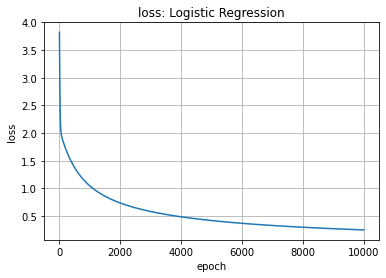

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def show_loss(epoch_lst, loss_lst, optimizer):
    fig, ax = plt.subplots()
    ax.plot(epoch_lst, loss_lst)

    ax.set(xlabel='epoch', ylabel='loss',
           title='loss: '+optimizer)
    ax.grid()

    # fig.savefig("test.png")
    plt.show()

show_loss(epoch_lst, loss_lst, 'Logistic Regression')

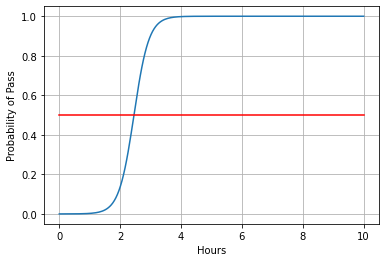

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,200)
x_t = torch.Tensor(x).view(200,1)
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()